# Aula 2 - SVM para dados não lineares



Vimos que o SVM é um **separador de margem máxima**, ou seja, ele é uma fronteira linear que temos margens.

São modelos **muito robustos** e versáteis, capazes de fazer:
- Classificação linear
- Classificação não linear
- Regressão

**Ideia:**
- Quanto maiores as margens, melhor o classificador.

**Margens:**

![imagem](https://miro.medium.com/v2/resize:fit:626/1*kRfvm_eGkkpRKrsUTPYYQQ.png)

**Vetores de Suporte:**

São os objetos de cada classe que estão **mais próximos um do outro**.

Eles servem de referência para obtermos as margens e a fronteira linear.

São os vetores que dão **suporte** e sustentam a fronteira linear entre as classes.

**Hiperplano:**

Para obter o hiperplano h(x), usamos o vetor w (perpendicular ao plano) um ponto x qulquer e b (constante de deslocamento).

As classes são classificadas de acordo com a lógica abaixo:

![HP](https://camo.githubusercontent.com/b8479e60b9eabf83fb6754e06a929a94b9f8e6a2ea885668c61a0e558e361837/68747470733a2f2f666972656261736573746f726167652e676f6f676c65617069732e636f6d2f76302f622f6465762d737461636b2d6170702e61707073706f742e636f6d2f6f2f73766d25324673766d2d6d696e2d6d696e2e706e673f616c743d6d6564696126746f6b656e3d64346636323530662d376531622d346538382d613831392d666563323430363136306263)

Olhando para as fronteiras e para as margens, podemos considerá-las usando a função (paralelas à fronteira) e trabalhamos com uma distância padrão (1 ou -1), ou seja, a **classificação das classes**, que é a exata distância da fronteira linear.

### Tipos de SVMs

**Problemas:**
- Classificação
- Regressão

**Dados:**
- Lineares
- Não Lineares

**Margem:**
- Rígidas
- Flexíveis

#### Lineares

Para problemas linearmente separáveis, temos:
- **SVM com margem rígida:** Só permitem os dados serem classificados fora do estado da margem. Assume que os dados podem ser totalmente separáveis (**na prática:** podem haver ruídos).

![Hard](https://camo.githubusercontent.com/b8479e60b9eabf83fb6754e06a929a94b9f8e6a2ea885668c61a0e558e361837/68747470733a2f2f666972656261736573746f726167652e676f6f676c65617069732e636f6d2f76302f622f6465762d737461636b2d6170702e61707073706f742e636f6d2f6f2f73766d25324673766d2d6d696e2d6d696e2e706e673f616c743d6d6564696126746f6b656e3d64346636323530662d376531622d346538382d613831392d666563323430363136306263)

**Problemas:**

    1) Só funciona para dados linearmente separáveis;
    2) Sensíveis a outliers

**Como resolver?** Tornando o modelo mais **flexível**...

- **SVM com margem suave:** Aceitam uma certa taxa de erros (permitem classificar alguns dados incorretamente) no treino e são mais **realistas** em situação em que não há separação perfeita.


![Soft](https://miro.medium.com/v2/resize:fit:1400/1*RgFWpCEG5AvnmGF5ESy1Tg.png)

O **objetivo** é encontrar um bom equillíbrio entre manter a rua a maior possível e limitar as **violações de margem**.

**Como ajustar no sklearn**

Para isso, use o [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) com o hiperparâmetro 'C':

- Um valor de C = 10000000000.0
- Um valor de C = 1

**C:** É um parâmetro de regularização l2 (*Ridge Regression*), usada em modelos de *Machine Learning* para prevenir o *overfitting*.

- Um valor baixo de C: **(observação dos alunos)**
- Um valor alto de C: **(observação dos alunos)**

#### Para um C muito grande

C = 10000000000.0

In [52]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [43]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [53]:
#Definindo X e y
X = df[["sepal_length","sepal_width"]]
y = df["species_id"]

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [55]:
#Salvar numa lista os nomes das classes
class_names = list(df["species"].unique())

In [56]:
#Filtrar apenas as classes 1 e 2 (id_species)
X = X[y != 3]
y = y[y != 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, stratify= y)

In [57]:
#Normalizar os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.svm import SVC

In [50]:
#Instanciar um SVM considerando a margem rígida
svm_hard_margin = SVC(kernel="linear", C = float(10**10))

In [60]:
svm_hard_margin.fit(X_train_scaled,y_train)

SVC(C=0.1, kernel='linear')

In [61]:
#Obter os coeficientes do hiperplan (w e b)
w = svm_hard_margin.coef_[0]
b = svm_hard_margin.intercept_[0]

#Definir os limites do gráfico
x_min, x_max = X_train_scaled[:,0].min() -1, X_train_scaled[:,0].max() +1
y_min, y_max = X_train_scaled[:,1].min() -1, X_train_scaled[:,1].max() +1

xx = np.linspace(x_min,x_max, 100)

#Calcular o hiperplano
yy = -(w[0] * xx +b) / w[1] #Hiperplano (fronteira de decisão)
yy_margin_up = yy + 1 / np.sqrt(np.sum(w**2)) #margem superior
yy_margin_down = yy - 1 / np.sqrt(np.sum(w**2)) #margem superior

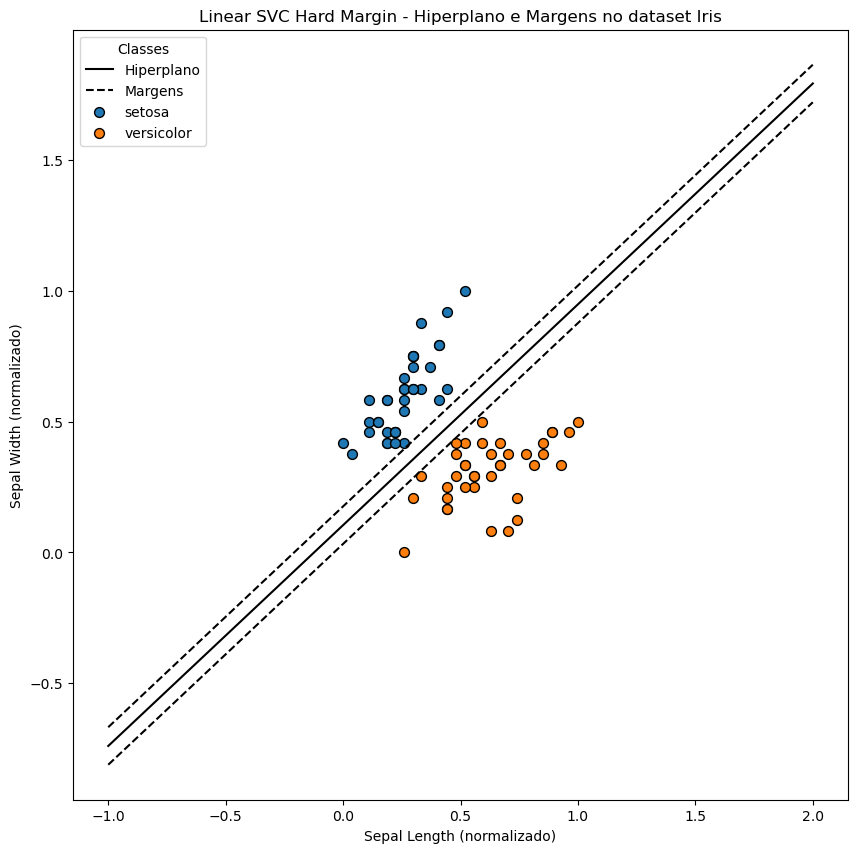

In [41]:
#plotar o gráfico
plt.figure(figsize=(10,10))
plt.plot(xx,yy,'k-', label='Hiperplano')
plt.plot(xx,yy_margin_up,'k--',label='Margens')
plt.plot(xx,yy_margin_down,'k--')

#Adicionar os pontos do conjunto de dados de treino
for i, class_name in enumerate(class_names[:2]):
    plt.scatter(X_train_scaled[y_train == i+1,0],X_train_scaled[y_train == i+1,1],label=class_name, edgecolors='k',s=50)

#Adicionar titulo, legendas e exibir a legenda
plt.xlabel('Sepal Length (normalizado)')
plt.ylabel('Sepal Width (normalizado)')
plt.title('Linear SVC Hard Margin - Hiperplano e Margens no dataset Iris')
plt.legend(title="Classes")
plt.show()

#### Para um C pequeno (soft margin)

C = 1.0

In [64]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [74]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [75]:
#Definindo X e y
X = df[["sepal_length","sepal_width"]]
y = df["species_id"]

In [76]:
#Salvar numa lista os nomes das classes
class_names = list(df["species"].unique())

In [77]:
#Filtrar apenas as classes 1 e 2 (id_species)
X = X[y != 3]
y = y[y != 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, stratify= y)

In [78]:
#Normalizar os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
#Instanciar um SVM considerando a margem flexivel
svm_soft_margin = SVC(kernel="linear", C = float(1))

In [80]:
svm_soft_margin.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [81]:
#Obter os coeficientes do hiperplan (w e b)
w = svm_soft_margin.coef_[0]
b = svm_soft_margin.intercept_[0]

#Definir os limites do gráfico
x_min, x_max = X_train_scaled[:,0].min() -1, X_train_scaled[:,0].max() +1
y_min, y_max = X_train_scaled[:,1].min() -1, X_train_scaled[:,1].max() +1

xx = np.linspace(x_min,x_max, 100)

#Calcular o hiperplano
yy = -(w[0] * xx +b) / w[1] #Hiperplano (fronteira de decisão)
yy_margin_up = yy + 1 / np.sqrt(np.sum(w**2)) #margem superior
yy_margin_down = yy - 1 / np.sqrt(np.sum(w**2)) #margem superior

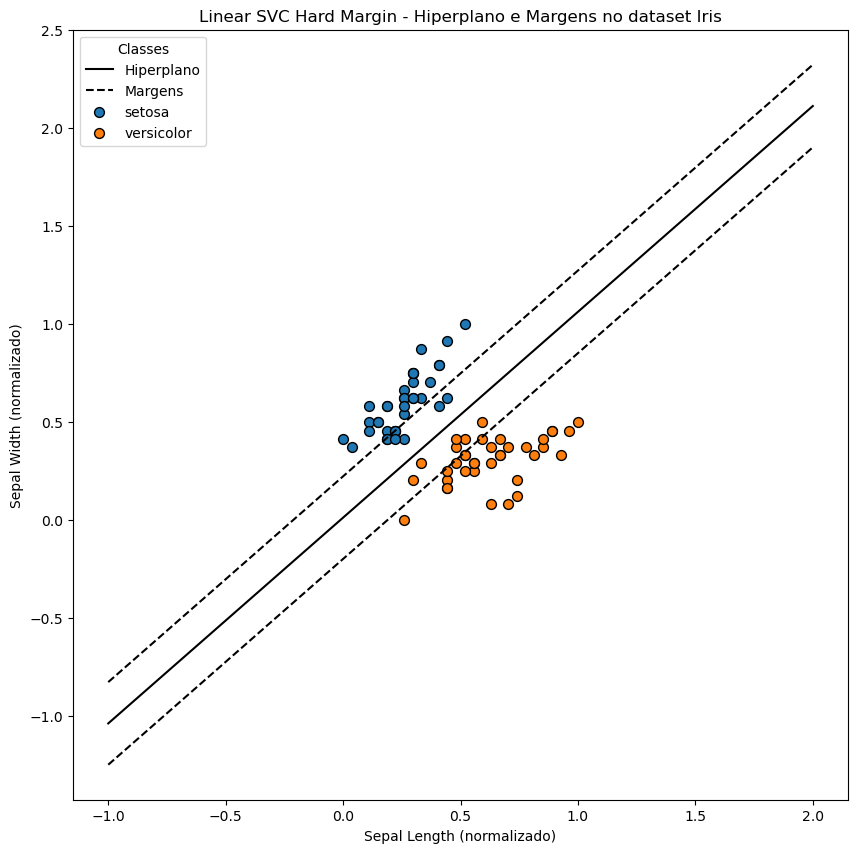

In [82]:
#plotar o gráfico
plt.figure(figsize=(10,10))
plt.plot(xx,yy,'k-', label='Hiperplano')
plt.plot(xx,yy_margin_up,'k--',label='Margens')
plt.plot(xx,yy_margin_down,'k--')

#Adicionar os pontos do conjunto de dados de treino
for i, class_name in enumerate(class_names[:2]):
    plt.scatter(X_train_scaled[y_train == i+1,0],X_train_scaled[y_train == i+1,1],label=class_name, edgecolors='k',s=50)

#Adicionar titulo, legendas e exibir a legenda
plt.xlabel('Sepal Length (normalizado)')
plt.ylabel('Sepal Width (normalizado)')
plt.title('Linear SVC Hard Margin - Hiperplano e Margens no dataset Iris')
plt.legend(title="Classes")
plt.show()

## Separabilidade não linear



Embora tenhamos classificadores lineares eficientes para muitos casos, na vida rea, nem sempre os dados sequer chegam perto de ter separabilidade linear.

![NL](https://miro.medium.com/v2/resize:fit:620/1*yLQxzD1GR9Wt2-kcAMVARg.png)

Uma abordagem é adicionar mais **features**, como características polinomiais, resultando em um conjunto linearmente separável, como na figura abaixo (1D para 2D):

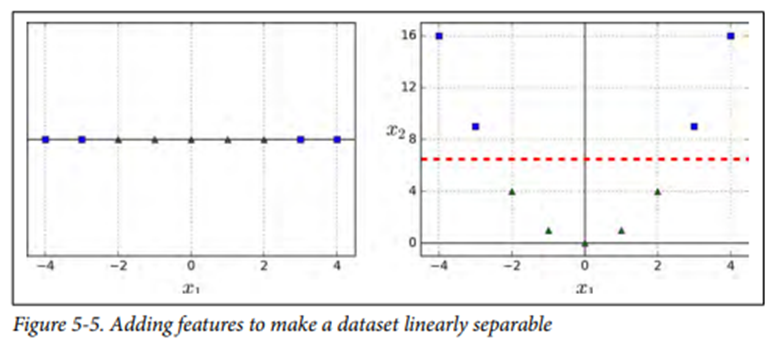

O procedimento que fizemos é chamado de **feature map**, e ele é matematicamente representado pelo mapa (função) $\Phi$. 

> Como $\Phi$ leva observações do espaço original ($1$D, uma única feature $X_1$, para vetores do novo espaço ($2$D, duas features, $X_1$ e $X_2$), o denotamos como: 
$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = (X_1, X_2)
\end{align*}$$

Note que no caso ilustrado acima, temos $X_2 = X_1^2$, isto é, $\Phi(\vec{x}) = (X_1, X_1^2)$.

Um pouco mais de terminologia:

> O "espaço original" é comumente chamado de **espaço de input** (representaremos por $\mathcal{X}$); enquanto o espaço após a aplicação do feature map é chamado de **espaço de features (representaremos por $\mathcal{Z}$)**

<img src=https://miro.medium.com/max/872/1*zWzeMGyCc7KvGD9X8lwlnQ.png width=400>

Também é comum se referir ao espaço de features como **espaço z**, devido à comum notação $\Phi(\vec{x}) \equiv \vec{z}$. Neste caso, teríamos:

$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = \vec{z} = (Z_1, Z_2)
\end{align*}$$

Uma vez que temos estas definições, podemos perceber a real utilidade do feature map: **os dados não eram linearmente separáveis no espaço de input, mas passaram a ser no espaço de features!**

Isso é realmente formidável, pois, se temos dados linearmente separáveis, podemos **treinar um classificador de margem suave** no espaço de features!

Isso pode parecer estranho, pois, afinal, gostaríamos de separar os dados no espaço original, não é mesmo?

Na verdade, nosso objetivo é que os dados sejam separados, **não importa em que espaço**! Se conseguirmos encontrar um espaço onde há separabilidade através da aplicação de um feature map, bastaria **aplicar o mesmo feature map** aos dados de treino e de teste, e a separabilidade sempre estará garantida!

Muito legal, não é mesmo?

**Vamos fazer isso na prática:**

**Exemplo:** Com esses dados.

E claro, embora tenhamos visto um feature map do tipo $\Phi : \mathbb{R}^1 \rightarrow \mathbb{R}^2$, eles podem assumir as mais diferentes formas! Em geral, podemos definir um feature map genérico como $\Phi : \mathcal{X} \rightarrow \mathcal{Z}$ (de forma concreta, $\Phi : \mathbb{R}^m \rightarrow \mathbb{R}^n$, para $m, n$ dimensões arbitrárias!)

Mais um exemplo, $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/105e0718-f938-4d09-919a-b37f79b410f7.PNG width=400>

<img src=https://i.pinimg.com/originals/bc/6b/75/bc6b756f5bf44b54f269b2c076cff162.gif width=400>

Finalmente, agora temos todos os elementos necessários para entender o que são as SVMs:

> Uma **Support Vector Machine** nada mais é que **um classificador de margem suave** treinado **no espaço de features**. Portanto, este classificador pressupõe a aplicação prévia de um **feature map** aos dados no espaço de input.

**Agora no 2D**

Testando para um polinômio de grau 20

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;
</ul>
</span>
<br>
</div>

#### Truque de Kernel

Adicionar muitas características polinomiais aos modelos pode não funcionar bem para conjuntos de dados muito complexos, criando assim, um grande número de características e tornando-o mais lento.

A solução está em aplicar a técnica do **Truque de Kernel (*kernel trick*)**.

Consiste em aplicar uma função kernel a pares de dados de entrada com o objetivo de encontrar outro espaço (com dimensão maior) para serem separados.

**Obs.:** Esse mapeamento do espaço de entrada para um espaço de dimensão maior é conhecido como **feature map**.

![Kernel](https://miro.medium.com/v2/resize:fit:1400/1*gXvhD4IomaC9Jb37tzDUVg.png)

Com isso, conseguimos obter o mesmo resultado, como se tivéssemos adicionando muitas características polinomiais, mesmo com polinômios de alto grau, sem adicioná-las na prática.

**Vantagem:** Não ocorre uma explosão combinatória do número de características, pois não adicionamos de fato nenhuma.

**Implementação**

### **Funções de kernel:**

Uma função de kernel $\kappa$ nada mais é que uma **medida de similaridade** entre dois vetores $\vec{x}$ e $\vec{x}'$ (que no nosso caso, são observações). Definimos como:

$$\boxed{\begin{align*}
\kappa \ \colon \ & \mathcal{X} \times \mathcal{X} \longrightarrow \mathbb{R} \\
& (\vec{x}, \vec{x}') \longmapsto \kappa(\vec{x}, \vec{x}')
\end{align*}}$$

Ou seja, um kernel é uma função que, dadas duas observações $\vec{x}$ e $\vec{x}'$, retorna um número real que caracteriza o quão similar as duas observações são entre si.

### **Principais kernels:**

1. Kernel Linear: Usado quando os dados já são linearmente separáveis.
$$ \kappa(\vec{x},\vec{x}') = \vec{x} . \vec{x}'$$
2. Kernel Polinomial: Projeta os dados em um espaço de maior dimensão usando combinações polinomiais das características.
$$ \kappa(\vec{x},\vec{x}') = (\gamma(\vec{x} . \vec{x}') + r)^{d} $$
3. Kernel RBF: É eficaz para separar classes não linearmente separáveis.
$$ \kappa(\vec{x},\vec{x}') =exp(-\gamma ||\vec{x} . \vec{x}'||^{2}) $$
4. Kernel Sigmoidal: Mais usado para quando temos classificação binária
$$ \kappa(\vec{x},\vec{x}') =tanh(\gamma(\vec{x} . \vec{x}') + r) $$

Podemos implementá-los com o hiperparâmetro kernel: {"linear", "poly", "rbf", "sigmoid"}.

## SVM na prática com o sklearn

Para construir um classificador SVM com o sklearn, basta usar a classe [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Vamos utilizar o dataset German Credit Risk!

Vamos, primeiro, desenhar uma função para carregar e processar nossos dados:

Vamos fazer, agora, uma função para avaliar o nosso modelo de classificação.

Agora, vamos instanciar a classe do [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)!

Perceba que há muitos hiperparâmetros. Vale a pena estudar um pouco mais o fundo o funcionamento de cada um, e sua influência. Para algumas dicas práticas do uso de SVMs com o sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

Na prática, os principais hiperparâmetros serão `C` e o `gamma` (se o kernel escolhido utilizar este parâmetro, como, por exemplo, o kernel rbf: por isso, o hiperparâmetro `kernel` também é importante!):


## **Hiperparâmetros importantes:**


### **C:** é um parâmetro de regularização, relacionado com a "suavidade" da margem. 

Ele controla o tradeoff entre a complexidade da fronteira de decisão, e erros de classificação que são permitidos.

Quanto **menor** o C:
- mais suave será a fronteira de decisão, pois mais erros de classificação são permitidos (isto é, a margem fica **mais larga**);

Quanto **maior** C:
- a tolerância a erros de classificação é menor (e a margem fica menos suave, mais complexa);

<img src="https://learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=500>

### **gamma ($\gamma$):** Coeficiente do Kernel RBF/Polinomial/Sigmoidal


Define a influência que cada ponto tem na fronteira de decisão.

<img src="https://sgao323.gitbooks.io/artificial-intelligence-projects/content/assets/svm_gamma.png" width=400>


Serve para controlar o "alcance" da influência de um único ponto de treinamento no modelo. Ele afeta o grau de complexidade do modelo.

**Um valor alto de gamma:**
- Faz com que cada ponto influencie apenas em sua proximidade imediata.
- Pode levar ao overfitting.

**Um valor baixo de gamma:**
- Faz com que os pontos tenham influência mais ampla.
- Pode levar ao underfitting.
- Quando é relevante: Apenas para kernels 'rbf', 'poly', e 'sigmoid'.

### **degree (d):** Grau do Kernel Polinomial

Determina o grau do polinômio no kernel 'poly'.

**Um valor alto de gamma:**
- Maior complexidade ao modelo (exemplo do moon).

### **coef0:** Termo independente

Controla o peso do termo independente (r) no kernel 'poly' ou 'sigmoid'.

Afeta a flexibilidade dos kernels polinomial e sigmoidal.

Colocando pesos nas classes:

Agora, podemos montar um gridsearch para otimizar o modelo:

## Support vector Regressor;



![Regressão](https://media.springernature.com/lw1200/springer-static/image/art%3A10.1007%2Fs10822-022-00442-9/MediaObjects/10822_2022_442_Fig1_HTML.png)

A função é formada a partir de tentar achar uma função linear na direção dos dados, usando o parâmetro ajustável (épsilon) que trabalha para mais ou menos na função gerada (os dados estão dentro da margem).

Diferente da SVM, buscamos um **modelo que preveja valores contínuos**, mantendo os desvios dentro de uma margem definida chamada $\epsilon$.

**Objetivo:** Minimizar erros maiores que essa margem, ignorando pequenos desvios, melhorando a generalização.

Margem de tolerância $\epsilon$: O valor padrão no sklearn é 0.1 (não pode ser negativo)
 - Define uma região em torno da função predita onde os desvios dos pontos não são penalizados.
- Apenas erros fora dessa margem são levados em consideração no processo de otimização.
- Isso cria um modelo robusto que evita o overfitting causado por pequenas variações nos dados.

## Mão na massa

A classe de regressores SVM no sklearn é a [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Vamos vê-la em ação!

Vamos ilustrar o processo de regressão com o SVM com apenas uma feature:

Por que eu usei o spearman?

Vamos fazer o fit com o regressor SVR:

Vamos fazer o fit com um regressor linear:

## Agora é com vocês

Altere os hiperparâmetros C, gamma e kernel para o problema de regressão.